In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


!pip install tensorflow


<h4><b>1. Quelle est la différence entre TensorFlow et Keras ?</b></h4>


TensorFlow est une bibliothèque bas niveau développée par Google, utilisée pour effectuer les calculs mathématiques nécessaires à l’apprentissage automatique et profond.
→ Il gère les tensors, la rétropropagation, l’exécution sur GPU/CPU, etc.

Keras est une API haut niveau intégrée à TensorFlow (tf.keras), qui simplifie la création, l’entraînement et l’évaluation des modèles de Deep Learning.

<h4><b> À quoi sert la couche Flatten dans un réseau de neurones ? </h4>

La couche Flatten transforme une image 2D (par exemple 28×28 pixels) en un vecteur 1D (784 valeurs).
Cela permet de connecter les neurones de la partie convolutionnelle (ou l’entrée image) à une couche dense (fully connected).

<h4> <b>4. À quoi servent Sequential et Dense ? </b></h4> 

Sequential = structure du réseau (enchaînement de couches)
Dense = type de couche (connexion complète entre neurones)

<h2 style="color:#1E90FF;">2. Chargement et préparation du dataset</h2>


In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0

x_test = x_test / 255.0

print("x_train forme :", x_train.shape)

print("y_train forme :", y_train.shape)

x_train forme : (60000, 28, 28)
y_train forme : (60000,)


 <h4><b>1. Pourquoi normalise-t-on les valeurs des pixels ?</b></h4>

Cela accélère la convergence pendant l’entraînement.

Cela stabilise le gradient lors de la rétropropagation.

Cela évite les grands écarts de valeurs, ce qui rend le modèle plus efficace.

<h4><b>2. Quelle est la taille d’une image et son type de données ?</h4>

In [30]:
print("Taille d'une image :", x_train[0].shape)
print("Type de données :", x_train.dtype)


Taille d'une image : (28, 28)
Type de données : float64


<h4><b>3. Combien d’exemples contient le jeu d’entraînement ?</h4>

Le dataset MNIST contient :

60 000 images pour l’entraînement (x_train, y_train)

10 000 images pour le test (x_test, y_test)

<h2 style="color:#1E90FF;">3. Visualisation d’échantillons</h2>

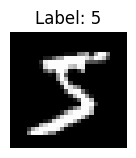

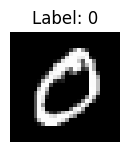

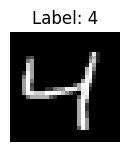

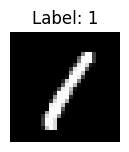

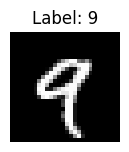

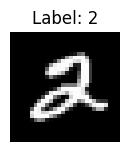

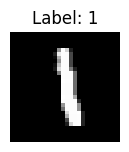

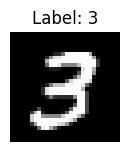

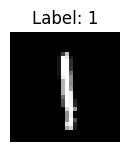

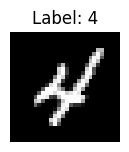

In [46]:
plt.figure(figsize=(8,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray' )
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

<h4><b> 1. Quelle commande permet de modifier le nombre d’images affichées ?</h4>

for i in range(10):
C’est cette ligne qui contrôle le nombre d’images affichées.

<h4><b>2. Que représente l’argument cmap='gray' ?</h4>

L’argument cmap (colormap) indique comment colorer les pixels lors de l’affichage de l’image.

cmap='gray' → affiche l’image en niveaux de gris (noir = 0, blanc = 255).

<h4><b> 3. Quelle utilité a cette étape dans un projet d’IA ?</h4>

Visualiser les données permet de s’assurer que le modèle apprendra à partir de données correctes et représentatives.

<h2 style="color:#1E90FF;">4. Construction du modèle de réseau de neurones</h2>

In [54]:
model = Sequential([
Input(shape=(28, 28)),
Flatten(),
Dense(128, activation='relu'),
Dense(10, activation='softmax')

])

model. summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

<h4><b> 1. Combien de paramètres le modèle contient-il ?</h4>

Le modèle contient (28×28) = 784 entrées (car chaque image fait 28×28 pixels).

<b>Couche 1 </b>: Dense(128, activation='relu')

Chaque neurone reçoit 784 entrées + 1 biais
<b>Nombre de paramètres</b> = (784 + 1) × 128 = 100 480 

Couche 2 : Dense(10, activation='softmax')

Chaque neurone reçoit 128 entrées + 1 biais
 <b>Nombre de paramètres </b>  = (128 + 1) × 10 = 1 290 -->

 <b>Total des paramètres du modèle :

100480+1290=101770


<h4><b> 2. Quelle est la fonction d’activation utilisée dans la couche de sortie ? Pourquoi ?</h4>

<b>C’est softmax.</b>
Elle transforme les valeurs de sortie en probabilités qui sommant à 1, donc :

Chaque sortie représente la probabilité que l’image appartienne à une des 10 classes (chiffres de 0 à 9 dans le dataset MNIST par exemple).

La classe prédite est celle avec la probabilité la plus élevée.

<b>Parce que c’est un problème de classification multiclasse → on veut une distribution de probabilités sur plusieurs catégories.

<h4><b> 3. Quelle est la différence entre ReLU et Softmax ?</h4>

<b>ReLU </b>: utilisée dans les couches cachées, met toutes les valeurs négatives à 0, laisse passer les positives.

<b>Softmax</b> utilisée dans la couche de sortie, transforme les valeurs en probabilités qui somment à 1 pour faire de la classification multiclasse.

<h2 style="color:#1E90FF;">5. Compilation du modèle</h2>

In [69]:
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']

)

<h4><b> 1. Qu’est-ce qu’un optimiseur ?</h4>

C’est un algorithme qui met à jour les poids du modèle pendant l’entraînement pour réduire la perte.

<h4><b> 2. Pourquoi utilise-t-on une fonction de perte ?</h4>

Elle mesure l’erreur entre les prédictions du modèle et les vraies valeurs.
Le modèle essaie de minimiser cette erreur pendant l’entraînement.

<h4><b> 3. Que se passe-t-il si on change la fonction de perte ?</h4>

Le modèle va apprendre différemment.

Si la perte choisie n’est pas adaptée au problème, le modèle ne convergera pas correctement.

#### <h4> <b>4. Quelle serait la conséquence d’un mauvais choix d’optimiseur ?

Le modèle va apprendre différemment.

Si la perte choisie n’est pas adaptée au problème, le modèle ne convergera pas correctement.

<h4><b> 5. Quelle est la différence entre loss et metrics ?</h4>

<b>loss	</b>:Fonction utilisée pour entraîner le modèle et ajuster les poids.
<b> metrics </b>	Indicateurs pour évaluer la performance du modèle pendant ou après l’entraînement (ex : accuracy).

<h2 style="color:#1E90FF;"> 6. Entraînement du modèle</h2>

In [86]:
history = model.fit(
x_train, y_train,
epochs=5,
batch_size=32,
validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9265 - loss: 0.2563 - val_accuracy: 0.9595 - val_loss: 0.1328
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9664 - loss: 0.1126 - val_accuracy: 0.9717 - val_loss: 0.0935
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9758 - loss: 0.0796 - val_accuracy: 0.9728 - val_loss: 0.0841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9816 - loss: 0.0588 - val_accuracy: 0.9769 - val_loss: 0.0802
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9857 - loss: 0.0456 - val_accuracy: 0.9763 - val_loss: 0.0792


<h4><b> 1. Que représente une “époque” ?</h4>

Une époque correspond à un passage complet de toutes les données d’entraînement dans le modèle.

<h4><b> 2. Pourquoi utilise-t-on un jeu de validation ?</h4>

Pour tester le modèle pendant l’entraînement sur des données qu’il n’a jamais vues.

<h4><b> 3. Que se passerait-il si on augmentait le nombre d’époques à 50 ?</h4>

Le modèle aurait plus de temps pour apprendre, donc la loss d’entraînement peut continuer à diminuer.

Mais si le modèle continue trop longtemps, il risque de surapprendre les données d’entraînement et de mal généraliser sur de nouvelles données.

<h2 style="color:#1E90FF;">7. Évaluation du modèle</h2>

In [97]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc :.4f}")
print(f"Test loss: {test_loss :.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0792
Test accuracy: 0.9763
Test loss: 0.0792


<h4><b> 1. Quelle est la précision finale de votre modèle ?</h4>

Précision finale = 0.9763 → le modèle prédit correctement 97,63 % des images du jeu de test.

<h4><b> 2. Pourquoi la précision du test est souvent inférieure à celle d’entraînement ?</h4>

Le modèle a été entraîné sur les données d’entraînement, il connaît mieux ces exemples.

Sur des données nouvelles (test), il peut faire plus d’erreurs → précision légèrement plus basse.

<h4><b>3. Que faire si le modèle surapprend (overfitting) ? 

on peut : augmenter les données d’entraînement (data augmentation) ,ajouter de la régularisation (Dropout, L2).

<h2 style="color:#1E90FF;">8. Visualisation des performances</h2>

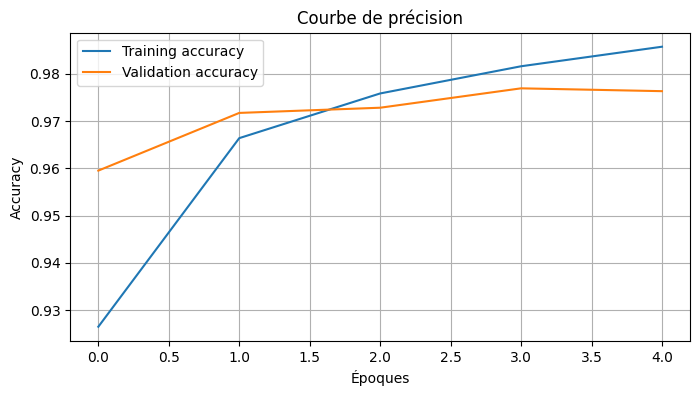

In [115]:
#Visualisation des performances 
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training accuracy' )
plt.plot(history.history['val_accuracy' ], label='Validation accuracy' )
plt.title('Courbe de précision' )
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend ()
plt.grid(True)
plt.savefig("Accuracy history between training and test")
plt.show()

<h4><b> 1. Que remarquez-vous sur les deux courbes ?</h4>

La courbe d’entraînement montre  une précision qui augmente à chaque époque.

La courbe de validation suit généralement la tendance, mais la courbe reste basse par rapport à la courbe d'entrainement

<h4><b> 2. Comment détecter visuellement un surapprentissage ?</h4>

Si la précision d’entraînement continue à augmenter mais que la précision de validation stagne ou diminue, c’est un signe de surapprentissage.

<h2 style="color:#1E90FF;">9. Prédictions et visualisation</h2>

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


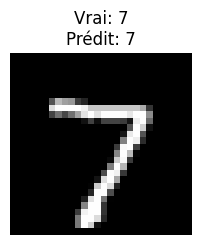

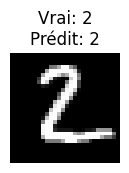

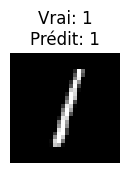

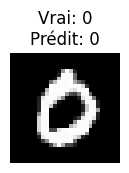

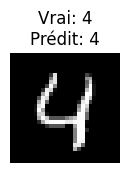

In [130]:
predictions = model.predict(x_test)

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Vrai: {y_test[i]}\nPrédit: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

<h4><b> 1. Le modèle fait-il des erreurs ? Sur quelles images </h4>

Non, le modèle ne fait pas d’erreurs sur le jeu de test.

<h4><b>2. Comment expliquer une prédiction erronée ?

Dans le cas général, une erreur peut arriver si :

L’image est floue ou mal tracée. Le modèle n’a pas assez appris certaines variations.

<h4><b>3. Quelle technique permettrait d’améliorer la précision (ex : CNN) ?

Utiliser des CNN (Convolutional Neural Networks) :

Ils détectent automatiquement les motifs et formes dans les images.

Meilleure généralisation sur les images réelles.